Этот ноутбук включается в себя:
##### 1. Исследовательский анализ данных.
   В этом разделе мы исследуем конкретный набор данных, рассматриваем распределения объектов, корреляцию признаков между собой, находим некоторые закономерности, аномалии, а также визуализируем данные с использованием библиотек Seaborn и matplotlib.
##### 2. Подготовка данных к построению моделей. 
   Представление категориальных признаков с помощью Label Encoding и One hot encoding. Стандартизация данных. Очистка данных от имеющихся в них выбросов.
##### 3. Метрики качества. 
   Выбор оптимальных метрик для задачи бинарной классификации.
##### 4. Построение моделей. 
   Построениe моделей и оценка их качества. Отбор признаков. Подбор гиперпараметров для моделей. Выбор наилучшей модели. 
##### 5. Заключение. 
   В этом разделе необходимо интерпретировать полученные с помощью построенной модели результаты.  

## Исследовательский анализ данных.

Импортируем необходимые библиотеки и загрузим данные:

In [465]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as st
from sklearn import ensemble, tree, linear_model
import warnings
warnings.filterwarnings("ignore")

In [466]:
data = pd.read_csv("/Users/liza/Downloads/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [467]:
data.shape

(1470, 35)

Данные содержат 1470 объектов и 35 признаков.

In [468]:
data.columns[data.isnull().sum() != 0]

Index([], dtype='object')

В наших данных нет пропущенных значений.

Посмотрим на основные показатели каждого признака: количество уникальных значений, медиана, стандартное отклонение, минимальное, максимальное и среднее значение, 25%, 50%, 75% квантили.

In [469]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Удалим три константных признака, они не имеют никакой важности для построения модели. Но мы будем знать, что все сотрудники компании старше 18 лет и стандартное количество часов для каждого сотрудника - 80. 

In [470]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace=True)

Теперь разберемся с EmployeeNumber. Это уникальный номер каждого сотрудника (повторений нет и не может быть), можно заменить этот столбец на столбец индексов. 

In [473]:
data = data.set_index('EmployeeNumber')

Необходимо разделить наши признаки на категориальные и числовые. 

In [479]:
categorical_columns = data.columns[data.dtypes == 'object']
num_columns = data.columns[data.dtypes == 'float64'].union(data.columns[data.dtypes == 'int64'])
len(categorical_columns), len(num_columns)

(8, 23)

Таким образом, в наших данных 8 категориальных признаков и 23 числовых. 

Нашей целевой переменной является столбец Attrition, в котором указано значение Yes, если сотрудник покинул компанию, и No, если нет.

In [31]:
data.groupby('Attrition').describe()

Age                                                   DailyRate  \
            count       mean      std   min   25%   50%   75%   max     count   
Attrition                                                                       
No         1233.0  37.561233  8.88836  18.0  31.0  36.0  43.0  60.0    1233.0   
Yes         237.0  33.607595  9.68935  18.0  28.0  32.0  39.0  58.0     237.0   

                       ... YearsSinceLastPromotion       YearsWithCurrManager  \
                 mean  ...                     75%   max                count   
Attrition              ...                                                      
No         812.504461  ...                     3.0  15.0               1233.0   
Yes        750.362869  ...                     2.0  15.0                237.0   

                                                         
               mean       std  min  25%  50%  75%   max  
Attrition                                                
No         4.367397  3.594116  0.0  2.0  3.0  7.0  17.0  
Yes        2.852321  3.143349  0.0  0.0  2.0  5.0  14.0  

[2 rows x 184 columns]

In [32]:
data.Attrition.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

Данные не являются сбалансированными относительно целевой переменной. Покажем это с помощью графиков.

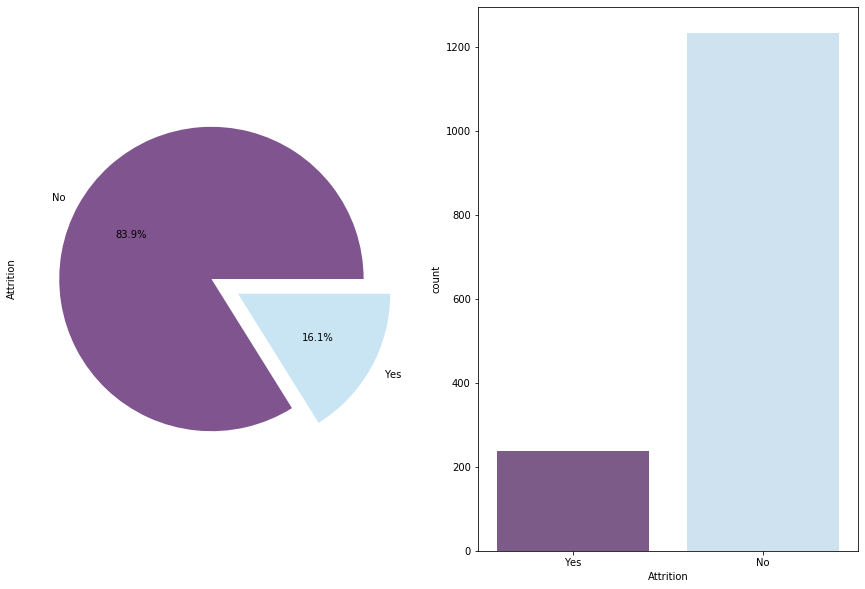

In [480]:
colors = ['#7f548f','#c9e5f4']

f,ax = plt.subplots(1,2, figsize=(15,10))
data.Attrition.value_counts().plot.pie(explode=[0,0.20], colors = colors, autopct='%1.1f%%',ax=ax[0])
sns.countplot('Attrition',data=data, palette = colors)
plt.show()

Построив матрицу корреляции, мы получим очень хороший обзор того, как признаки связаны друг с другом. 

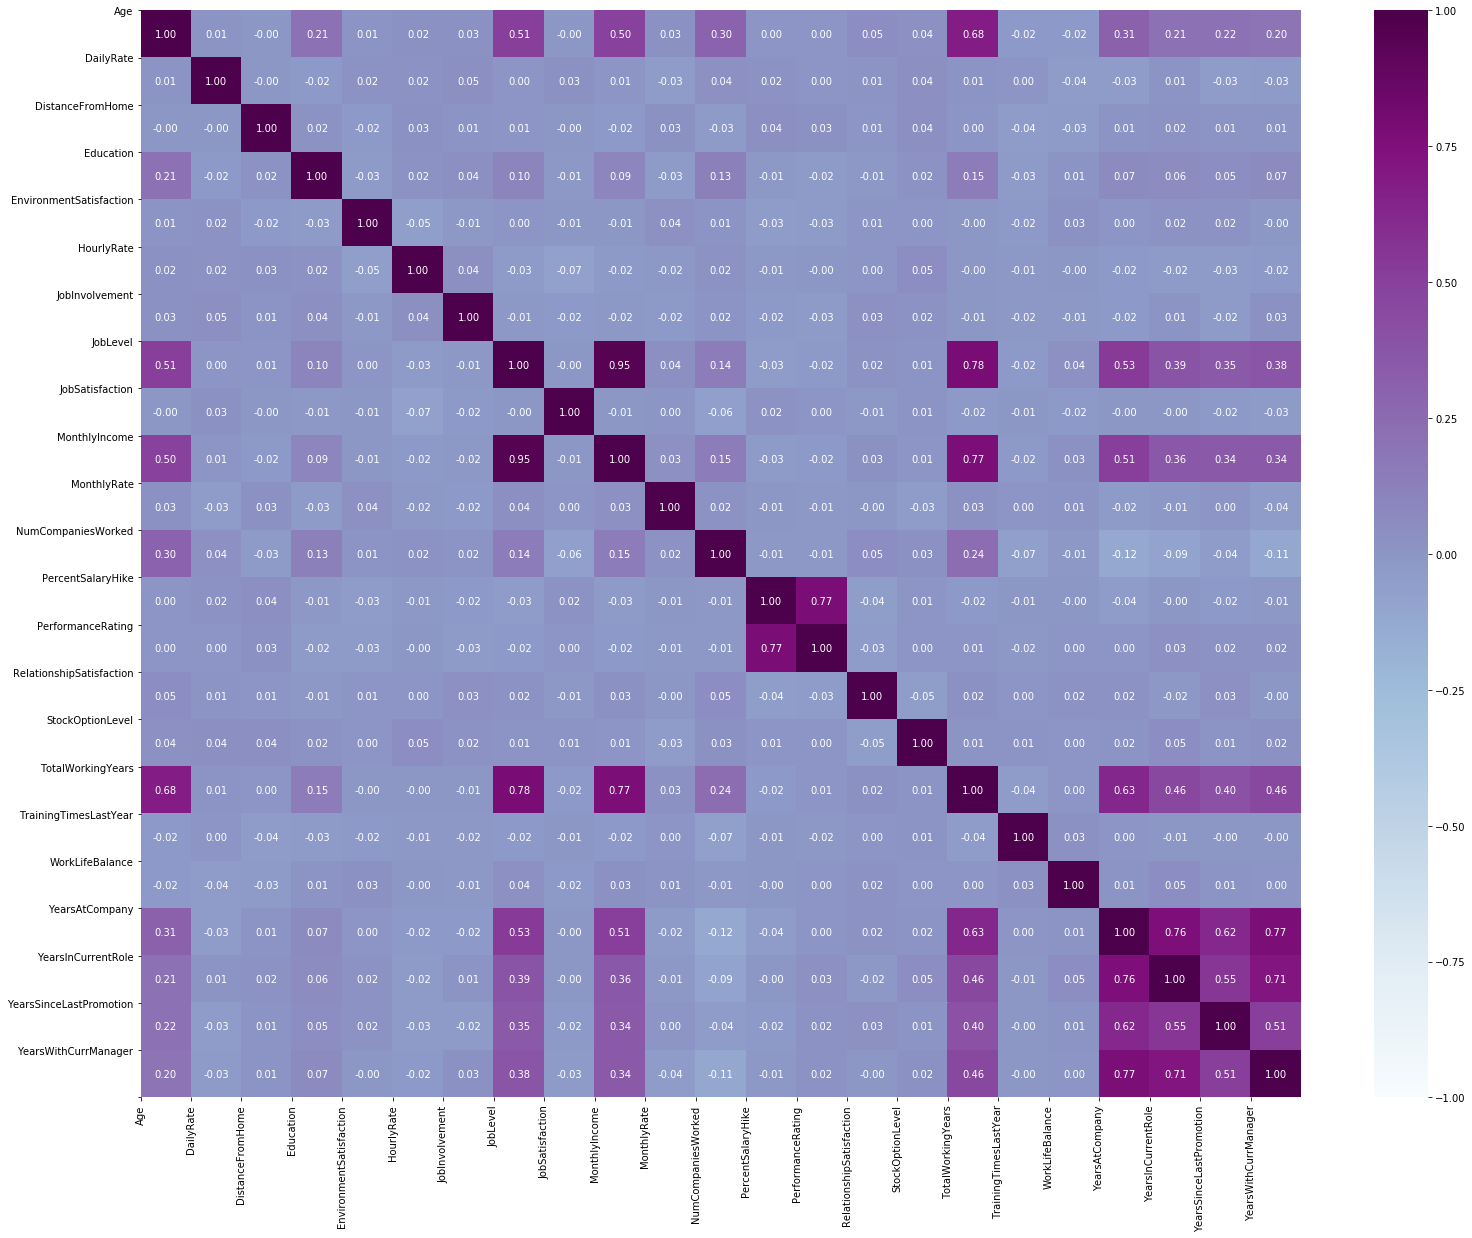

In [483]:
corr = data[num_columns].corr()

fig, ax = plt.subplots(figsize=(26, 20))

sns.heatmap(corr, cmap="BuPu", annot=True, fmt=".2f", vmin = -1, vmax = 1)

plt.xticks(range(len(corr.columns)), corr.columns)

plt.yticks(range(len(corr.columns) + 1), corr.columns) # о - белый 

plt.show()

Из графика видно, что довольно много наших столбцов плохо коррелируют друг с другом. Как правило, при создании прогнозирующей модели было бы предпочтительнее обучать модель с признаками, которые не слишком связаны друг с другом, чтобы нам не приходилось иметь дело с избыточными признаками. 

Обратим внимание на наиболее коррелирующие признаки. 
Месячный доход (MonthlyIncome) и уровень работы (JobLevel) связаны с количеством проработанных лет (TotalWorkingYears). Уровень производительности (PerformanceRating) сотрудника имеет сильную корреляцию с признаком, который отражает процент повышения зарплаты (PercentSalaryHike).
А также, количество лет в компании (YearsAtCompany), количество лет на текущей позиции (YearsInCurrentRole) имеют взаимосвязь с количеством лет, которые сотрудник работает с текущим руководителем (YearsWithCurrManager).

Рассмотрим некоторые признаки более подробно: PerformanceRating, MaritalStatus, RelationshipSatisfaction, WorkLifeBalance, OverTime, StockOptionLevel, JobLevel, MonthlyIncome. 

##### PerformanceRating (уровень производительности):        
 1. 'Low',
 - 'Good',
 - 'Excellent', 
 - 'Outstanding'.

In [43]:
 data[data.Attrition == 'Yes'].PerformanceRating.value_counts()

3    200
4     37
Name: PerformanceRating, dtype: int64

In [42]:
 data[data.Attrition == 'No'].PerformanceRating.value_counts()

3    1044
4     189
Name: PerformanceRating, dtype: int64

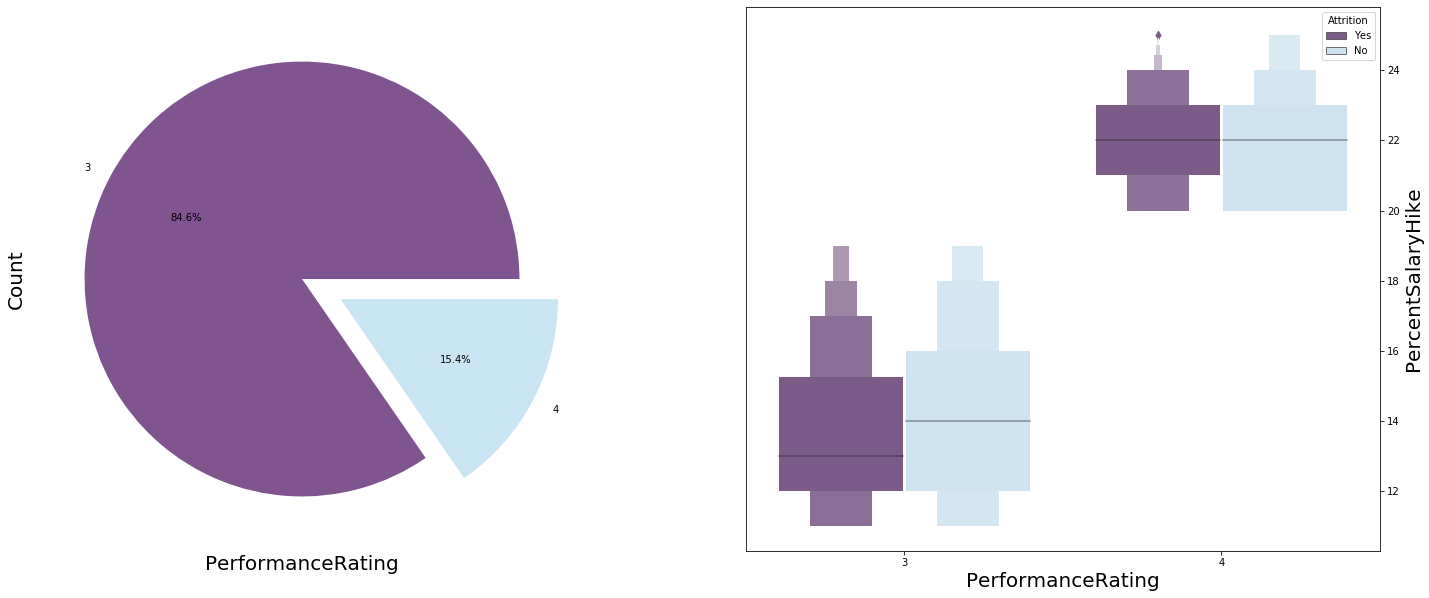

In [539]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

f = data.PerformanceRating.value_counts().plot.pie(explode=[0,0.20], colors=colors, autopct='%1.1f%%',  ax=axes[0])
axes[0].set_xlabel('PerformanceRating', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'PerformanceRating', y = 'PercentSalaryHike', data = data, hue = 'Attrition', palette=colors, ax = axes[1])
#ax = sns.stripplot(x = "JobLevel", y = "MonthlyIncome", data=data, color="gray", size = 3)
axes[1].set_xlabel('PerformanceRating', fontsize = 20)
axes[1].set_ylabel('PercentSalaryHike', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()


plt.show()

В наших данных рейтинг производительности у всех сотрудников 'Excellent' или 'Outstanding'. А процентное соотношение 'Excellent' и 'Outstanding' среди действующих и выбывших сотрудников примерно одинаковое (около 15% с максимальным рейтингом).

Из правого графика видно, что средний процент повышения зарплаты выше у сотрудников, имеющих больший уровень производительности. Кроме того, у уволившихся сотрудников, имеющих отличный уровень производительности, средний процент повышения зарплаты ниже, чем у оставшихся и имеющих такой же PerformanceRating. 


#####  MaritalStatus(семейное положение), RelationshipSatisfaction (удовлетворенность коллективом):

RelationshipSatisfaction:
1. 'Low'
2. 'Medium'
3. 'High'
4. 'Very High’

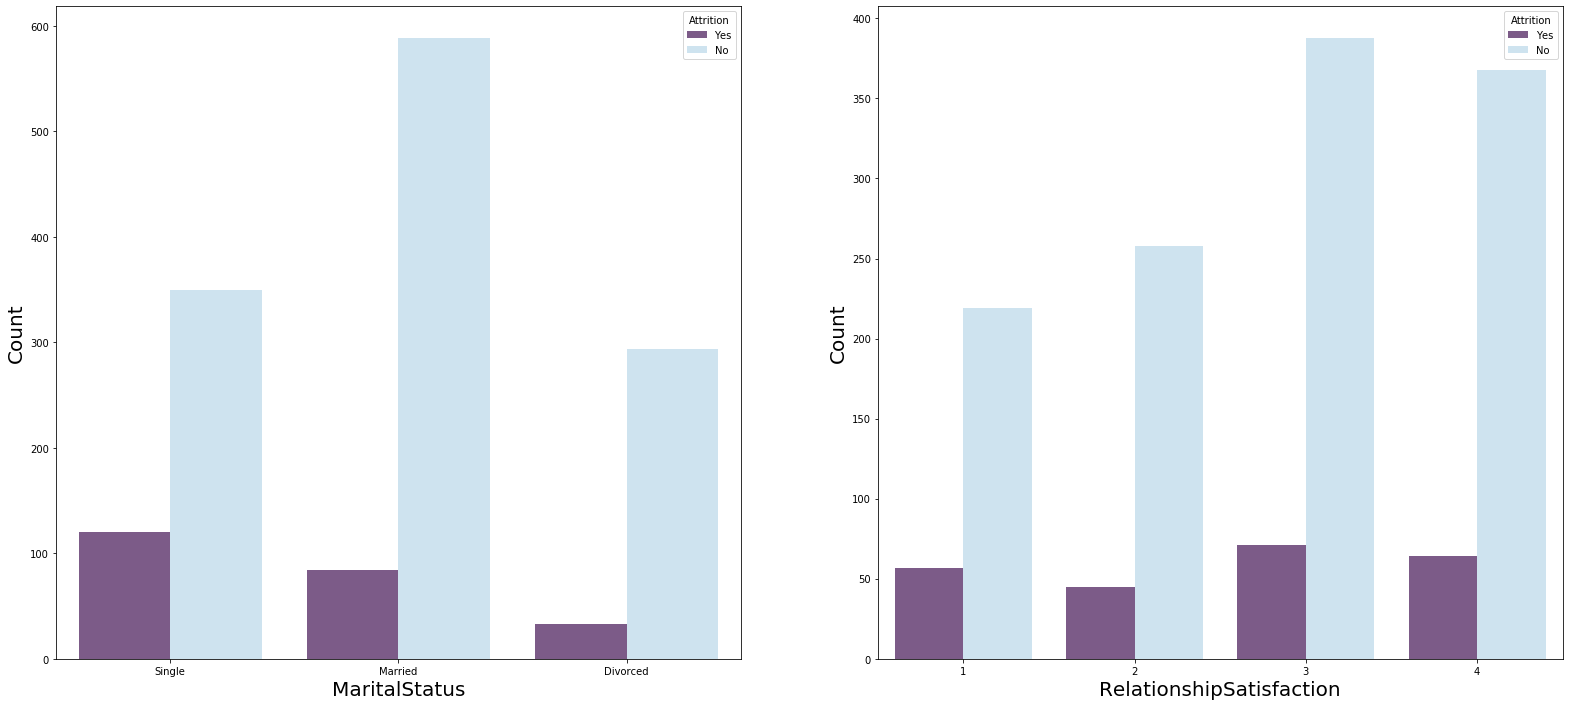

In [501]:
f, axes = plt.subplots(1, 2, figsize=(27,12))

f = sns.countplot('MaritalStatus',data=data, palette=colors, hue = 'Attrition', ax = axes[0])
axes[0].set_xlabel('MaritalStatus', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()


f = sns.countplot('RelationshipSatisfaction',data=data, palette=colors, hue = 'Attrition', ax = axes[1])
axes[1].set_xlabel('RelationshipSatisfaction', fontsize = 20)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].yaxis.tick_left()

plt.show()

In [503]:
 data[data.Attrition == 'Yes'].MaritalStatus.value_counts(normalize=True)

Single      0.506329
Married     0.354430
Divorced    0.139241
Name: MaritalStatus, dtype: float64

In [504]:
data[data.Attrition == 'No'].MaritalStatus.value_counts(normalize=True)

Married     0.477697
Single      0.283861
Divorced    0.238443
Name: MaritalStatus, dtype: float64

И среди уволившихся, и среди оставшихся сотрудников около 50% в браке. 

In [505]:
data[data.Attrition == 'No'].RelationshipSatisfaction.value_counts(normalize=True)

3    0.314680
4    0.298459
2    0.209246
1    0.177616
Name: RelationshipSatisfaction, dtype: float64

In [506]:
data[data.Attrition == 'Yes'].RelationshipSatisfaction.value_counts(normalize=True)

3    0.299578
4    0.270042
1    0.240506
2    0.189873
Name: RelationshipSatisfaction, dtype: float64

Здесь тоже нет ничего необычного, в обоих классах большинство сотрудников удовлетворены отношениями с коллегами.

#####  JobLevel (уровень занимаемой должности):

In [510]:
data.groupby('Attrition').JobLevel.value_counts(normalize=True)

Attrition  JobLevel
No         2           0.390916
           1           0.324412
           3           0.150852
           4           0.081914
           5           0.051906
Yes        1           0.603376
           2           0.219409
           3           0.135021
           4           0.021097
           5           0.021097
Name: JobLevel, dtype: float64

Среди уволившихся сотрудников (около 60%) занимали низкие должности. Среди оставшихся около 40% имеют JobLevel - 2.

Так как JobLevel и MonthlyIncome - сильно коррелирующие признаки, то посмотрим на то, какая связь между ними может быть.

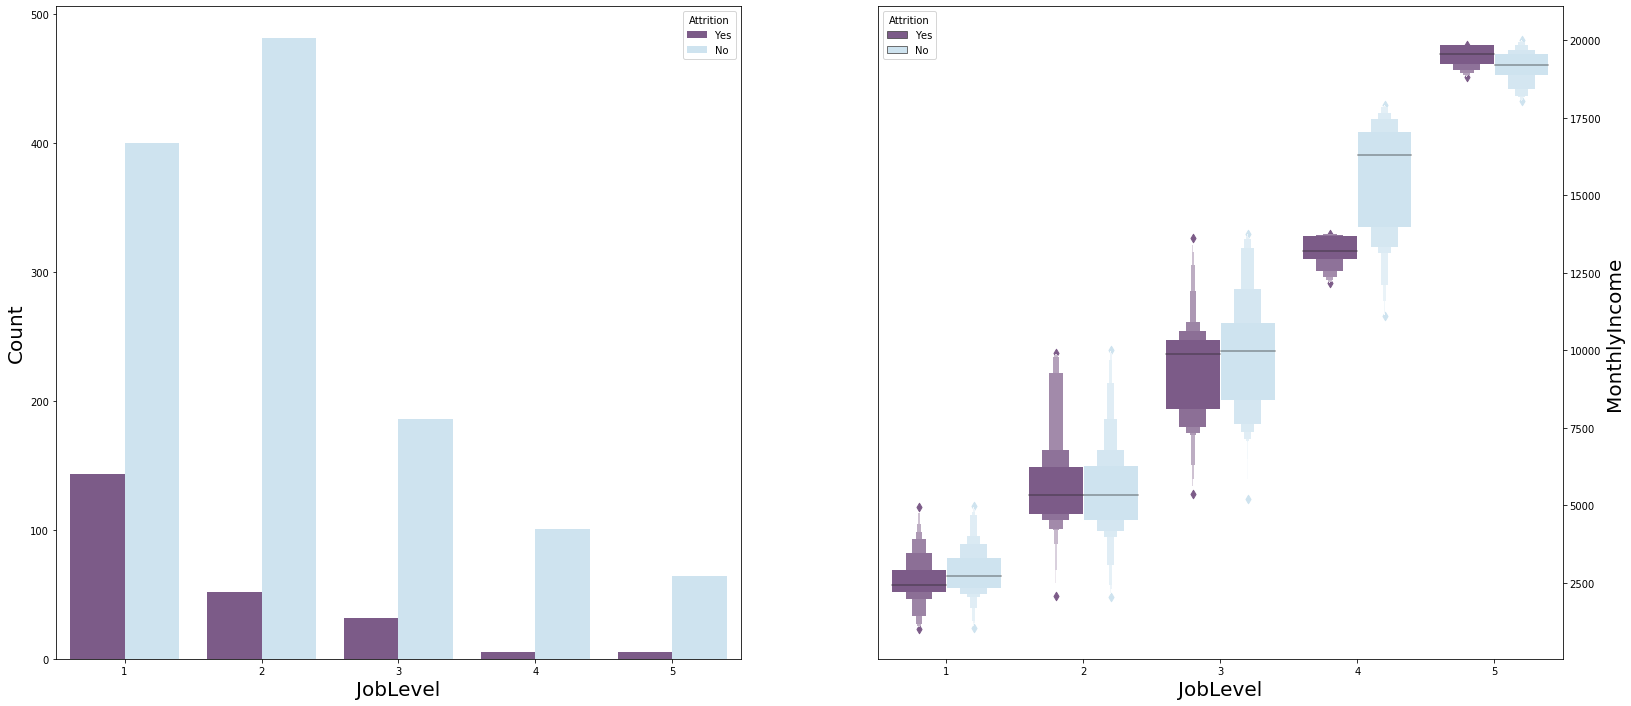

In [511]:
f, axes = plt.subplots(1, 2, figsize=(27,12))

f = sns.countplot('JobLevel',data=data, palette=colors, hue = 'Attrition', ax = axes[0])
axes[0].set_xlabel('JobLevel', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()


ax = sns.boxenplot(x = 'JobLevel', y = 'MonthlyIncome', data = data, hue = 'Attrition', palette=colors, ax = axes[1])
#ax = sns.stripplot(x = "JobLevel", y = "MonthlyIncome", data=data, color="gray", size = 3)
axes[1].set_xlabel('JobLevel', fontsize = 20)
axes[1].set_ylabel('MonthlyIncome', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()


plt.show()

Можно заметить, что средний месячный доход сотрудников увеличивается вместе с уровнем занимаемой должности.

#####  StockOptionLevel (уровень опционов на акции), WorkLifeBalance (баланс жизни и работы):

WorkLifeBalance:
1. 'Bad'
2. 'Good'
3. 'Better'
4. ‘Best'


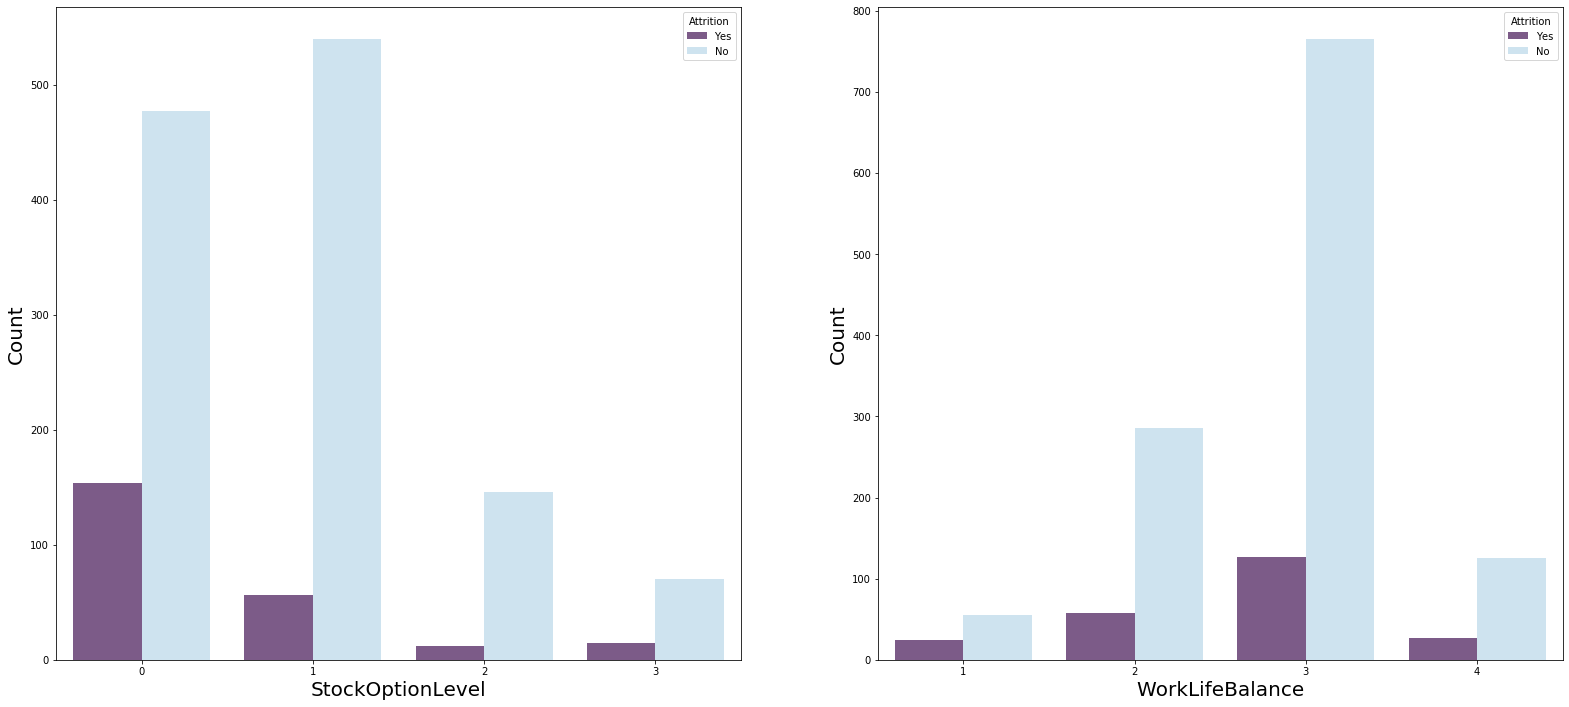

In [519]:
f, axes = plt.subplots(1, 2, figsize=(27,12))

f = sns.countplot('StockOptionLevel',data=data, palette=colors, hue = 'Attrition', ax = axes[0])
axes[0].set_xlabel('StockOptionLevel', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()


f = sns.countplot('WorkLifeBalance',data=data, palette=colors, hue = 'Attrition', ax = axes[1])
axes[1].set_xlabel('WorkLifeBalance', fontsize = 20)
axes[1].set_ylabel('Count', fontsize=20)
axes[1].yaxis.tick_left()

plt.show()

In [521]:
data.groupby('Attrition').WorkLifeBalance.value_counts(normalize=True)

Attrition  WorkLifeBalance
No         3                  0.621249
           2                  0.231955
           4                  0.102190
           1                  0.044607
Yes        3                  0.535865
           2                  0.244726
           4                  0.113924
           1                  0.105485
Name: WorkLifeBalance, dtype: float64

Можно заметить, что среди тех, кто остался, только 4% имеют плохой баланс жизни и работы, среди уволившихся уже 10%. Также, сотрудников, имеющих WorkLifeBalance - 3, среди оставшихся - 62%, а среди уволившихся уже 53%.   

#####  OverTime (переработка):

In [527]:
data.groupby('Attrition').OverTime.value_counts()

Attrition  OverTime
No         No          944
           Yes         289
Yes        Yes         127
           No          110
Name: OverTime, dtype: int64

In [ ]:
data[data.Attrition == 'No'].OverTime.value_counts(normalize=True)

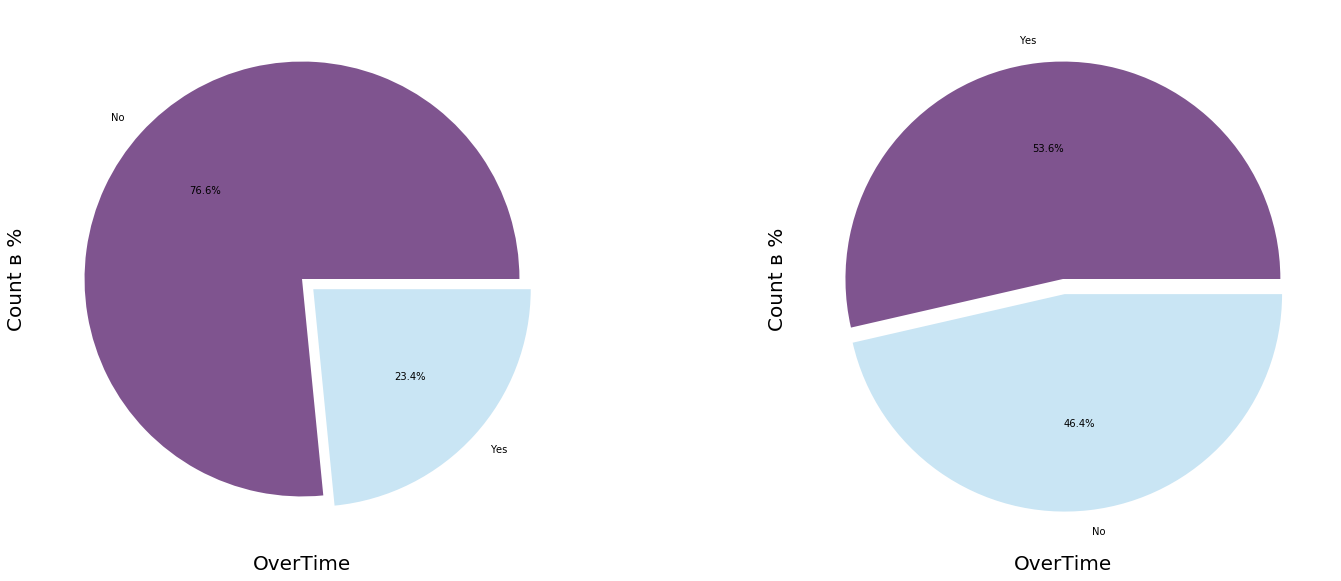

In [536]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

f = data[data.Attrition == 'No'].OverTime.value_counts(normalize=True).plot.pie(explode=[0,0.07], colors=colors, autopct='%1.1f%%',  ax=axes[0])
axes[0].set_xlabel('OverTime', fontsize = 20)
axes[0].set_ylabel('Count в %', fontsize=20)
axes[0].yaxis.tick_left()


f = data[data.Attrition == 'Yes'].OverTime.value_counts(normalize=True).plot.pie(explode=[0,0.07], colors=colors, autopct='%1.1f%%',  ax=axes[1])
axes[1].set_xlabel('OverTime', fontsize = 20)
axes[1].set_ylabel('Count в %', fontsize=20)
axes[1].yaxis.tick_left()


plt.show()

Слева показана диаграмма для оставшихся сотрудников, справа - для уволившихся. 

Среди уволившихся больше половины сотрудников имели переработку, в то время как среди оставшихся - только около 23%.

#####  MonthlyIncome (месячный доход):

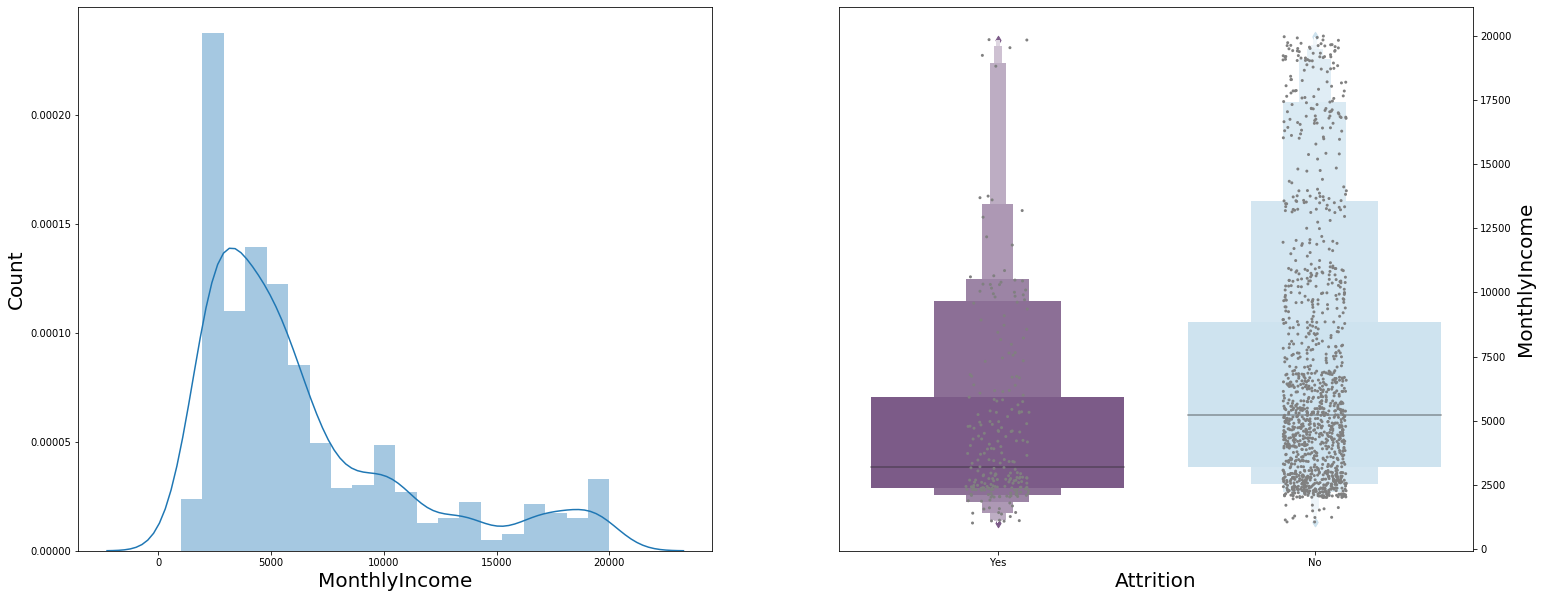

In [542]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['MonthlyIncome'], ax = axes[0])
axes[0].set_xlabel('MonthlyIncome', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'MonthlyIncome', data = data, palette= colors,  ax = axes[1])
ax = sns.stripplot(x = "Attrition", y = "MonthlyIncome", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('MonthlyIncome', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()


Средний месячный доход у уволившихся сотрудников ниже, чем у оставшихся. Также, по графикам видно, что в наших данных есть выбросы (аномально большие значения MonthlyIncome). 

#####  TotalWorkingYears (количество проработанных лет):

In [45]:
data.TotalWorkingYears.unique()

array([ 8, 10,  7,  6, 12,  1, 17,  5,  3, 31, 13,  0, 26, 24, 22,  9, 19,
        2, 23, 14, 15,  4, 29, 28, 21, 25, 20, 11, 16, 37, 38, 30, 40, 18,
       36, 34, 32, 33, 35, 27])

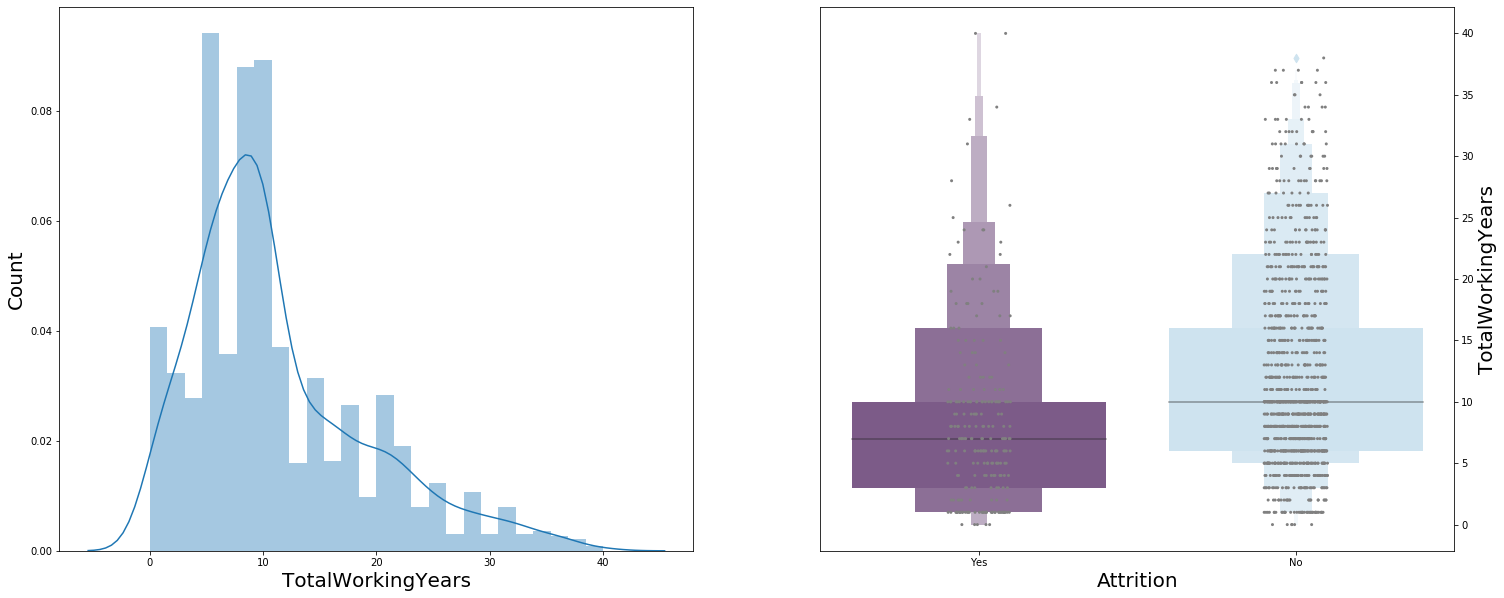

In [543]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['TotalWorkingYears'], ax = axes[0])
axes[0].set_xlabel('TotalWorkingYears', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'TotalWorkingYears', data = data, palette= colors,  ax = axes[1])
ax = sns.stripplot(x = "Attrition", y = "TotalWorkingYears", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('TotalWorkingYears', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

Аналогично MonthlyIncome, в распределении есть "тяжелый хвост", т.е аномально большое количество проработанных лет (больше 25).

#####  YearsAtCompany (количество проработанных лет в компании):

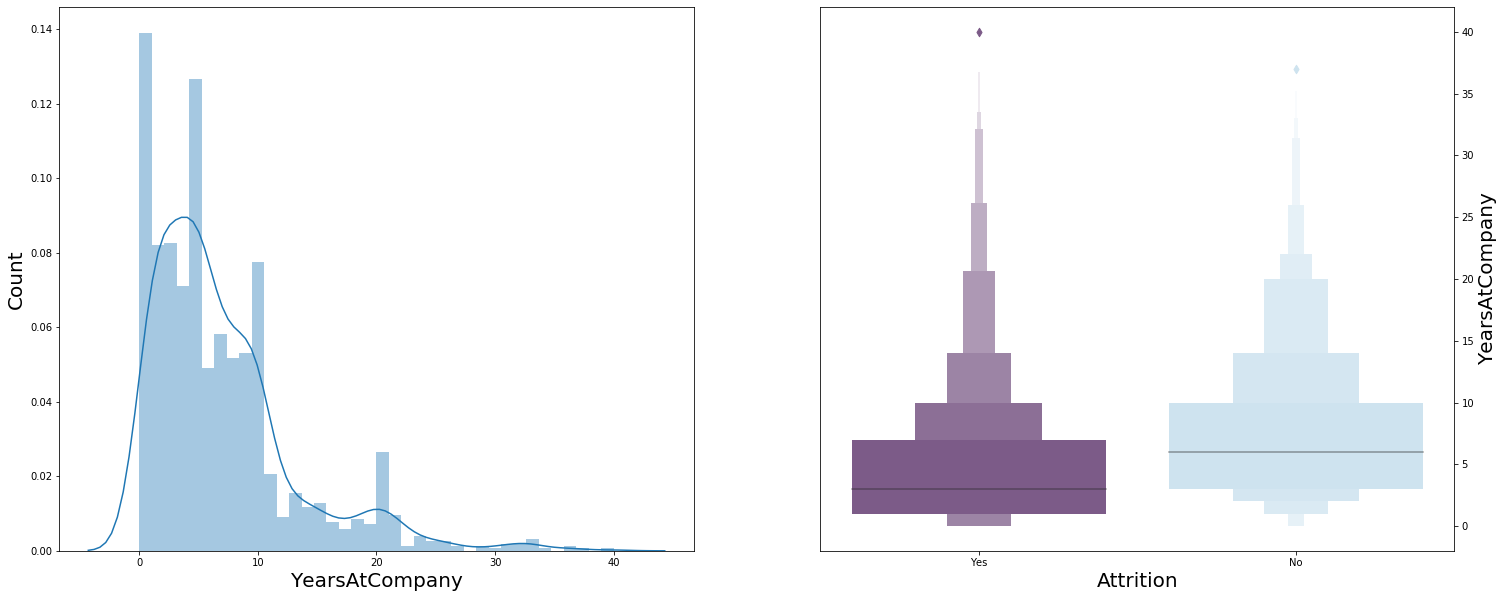

In [547]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['YearsAtCompany'], ax = axes[0])
axes[0].set_xlabel('YearsAtCompany', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'YearsAtCompany', data = data, palette= colors,  ax = axes[1])
#ax = sns.stripplot(x = "Attrition", y = "TotalWorkingYears", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('YearsAtCompany', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

В компании есть сотрудники, которые проработали аномально большое количество лет (от 25 лет). 

#####  YearsWithCurrManager (количество лет с текущим руководителем), YearsInCurrentRole (количество лет на текущей позиции):

In [548]:
data.YearsWithCurrManager.unique()

array([ 5,  7,  0,  2,  6,  8,  3, 11, 17,  1,  4, 12,  9, 10, 15, 13, 16,
       14])

In [555]:
data.YearsInCurrentRole.unique()

array([ 4,  7,  0,  2,  5,  9,  8,  3,  6, 13,  1, 15, 14, 16, 11, 10, 12,
       18, 17])

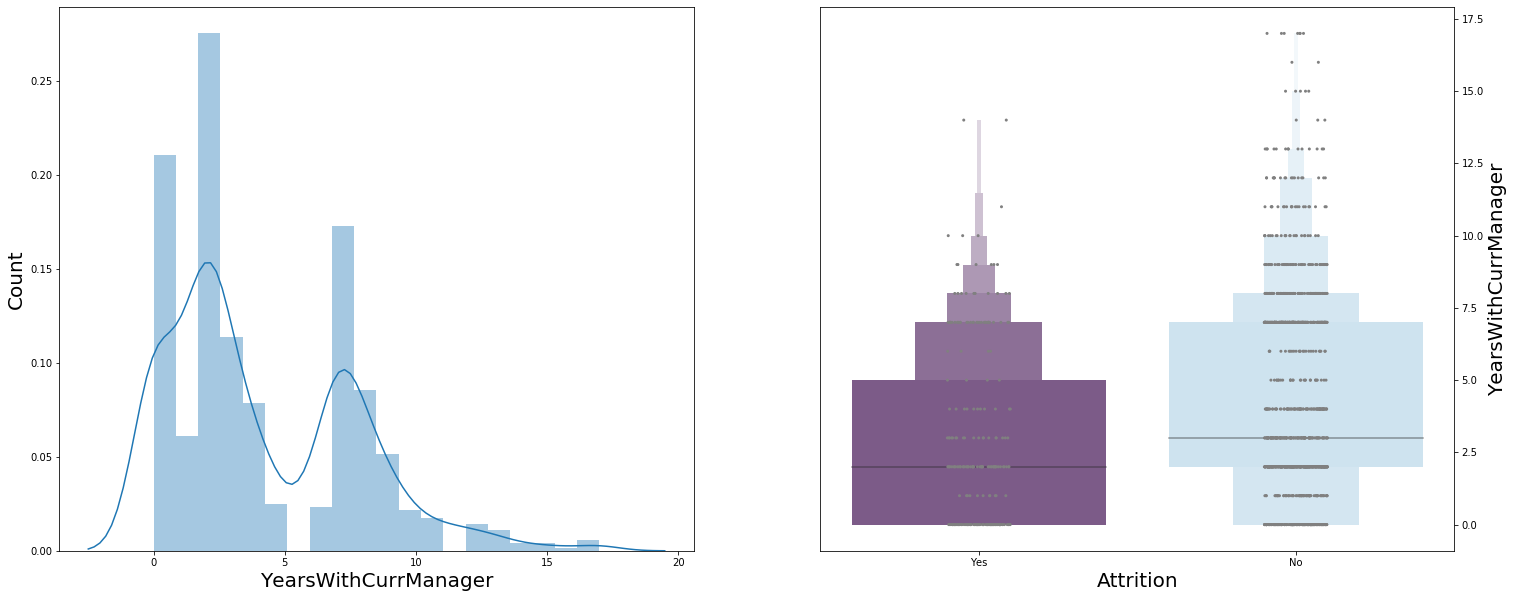

In [549]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['YearsWithCurrManager'], ax = axes[0])
axes[0].set_xlabel('YearsWithCurrManager', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'YearsWithCurrManager', data = data, palette= colors,  ax = axes[1])
ax = sns.stripplot(x = "Attrition", y = "YearsWithCurrManager", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('YearsWithCurrManager', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

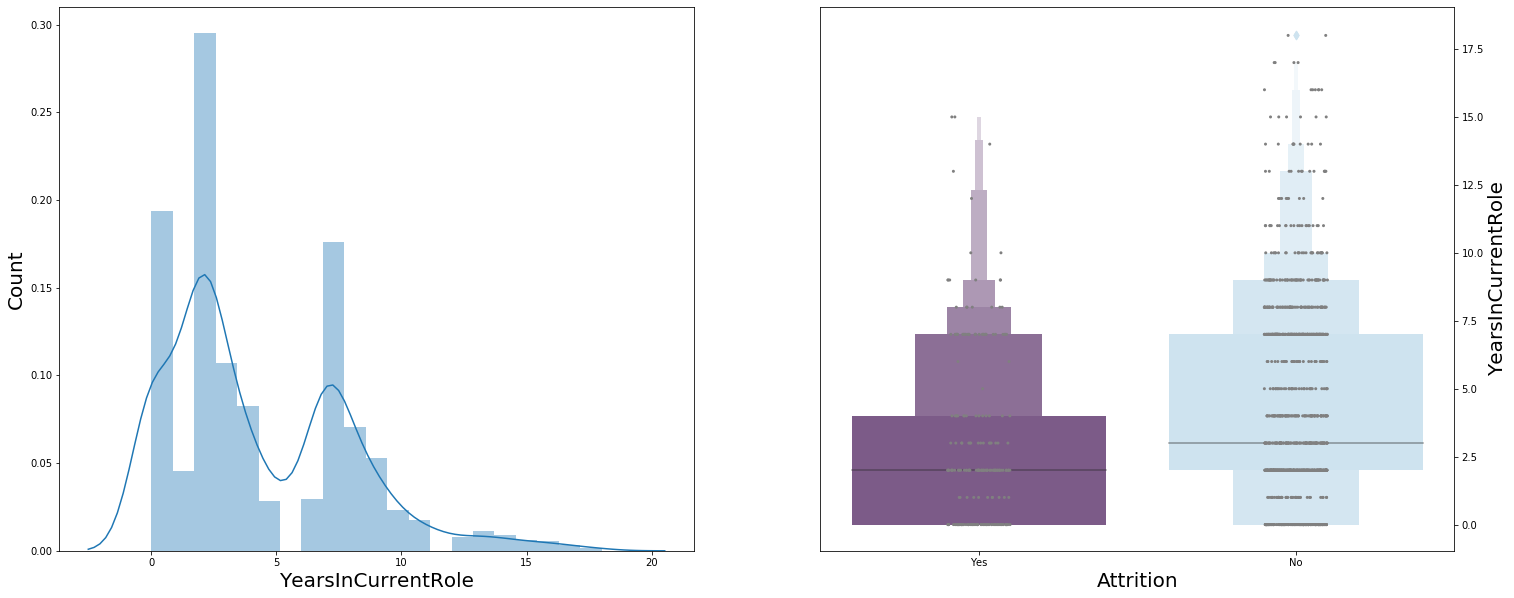

In [554]:
f, axes = plt.subplots(1, 2, figsize=(25,10))

sns.distplot(data['YearsInCurrentRole'], ax = axes[0])
axes[0].set_xlabel('YearsInCurrentRole', fontsize = 20)
axes[0].set_ylabel('Count', fontsize=20)
axes[0].yaxis.tick_left()

ax = sns.boxenplot(x = 'Attrition', y = 'YearsInCurrentRole', data = data, palette= colors,  ax = axes[1])
ax = sns.stripplot(x = "Attrition", y = "YearsInCurrentRole", data=data, color="gray", size = 3)
axes[1].set_xlabel('Attrition', fontsize = 20)
axes[1].set_ylabel('YearsInCurrentRole', fontsize = 20)
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

plt.show()

В распределении есть пропуски и "тяжелый хвост". Среди уволившихся есть сотрудники, проработавшие с текушим руководителем и на текущей позиции, больше 12,5 лет. 

Pairplot показывает отношения между всеми парами переменных. Рассмотрим наиболее интересные признаки, которые имеют среднюю корреляцию между собой. 

In [551]:
columns = ['Age', 'MonthlyIncome', 'YearsAtCompany', 'JobLevel', 'Attrition']

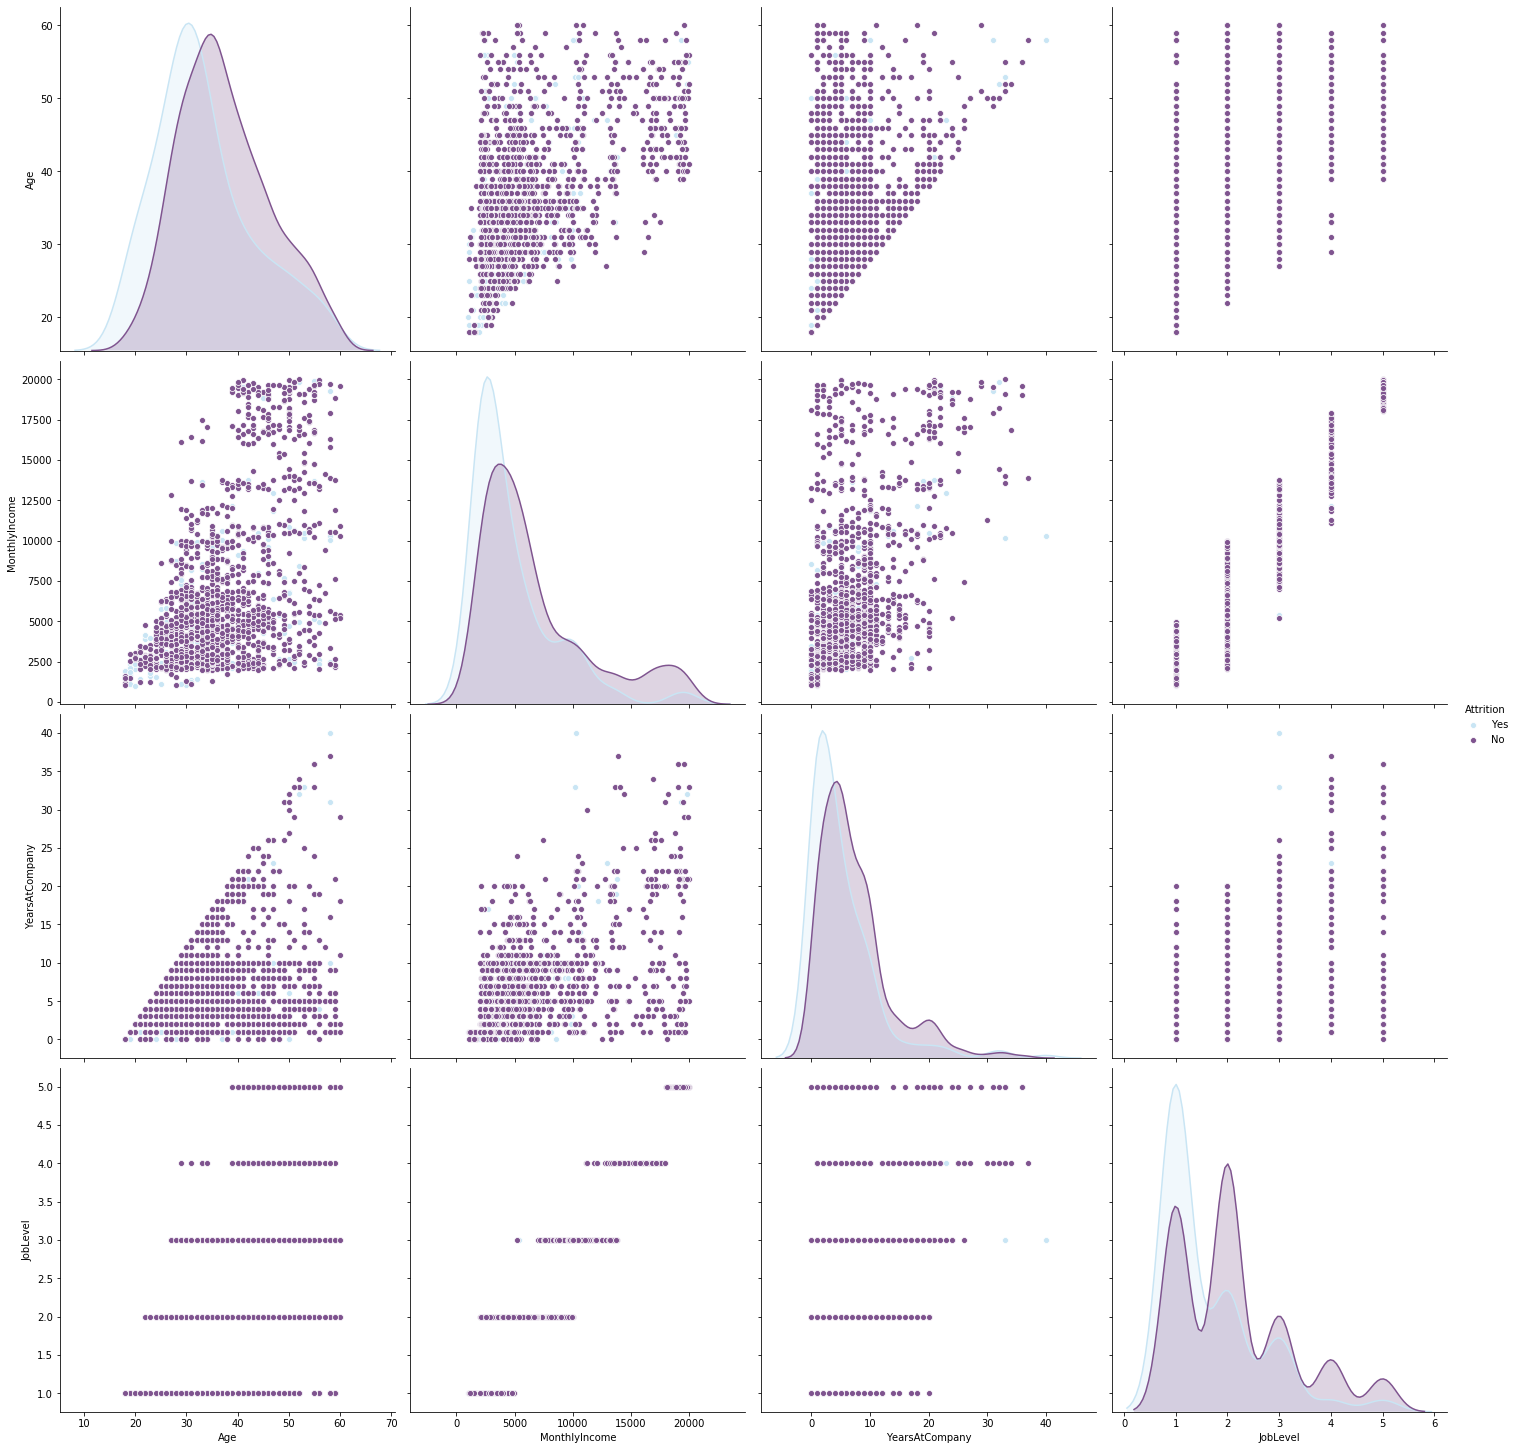

In [556]:
colors = ['#c9e5f4', '#7f548f']
sns.pairplot(data[columns], height = 5, hue = 'Attrition', kind="scatter", palette=colors)

Закономерности:
1. Почти нет тех сотрудников, которые до 40 получают высокую зарплату.
2. Никто не достигает уровня занимаемой должности 4-5 в возрасте до 30 лет (5 - только после 40).
3. Нет сотрудников, которые после 20 лет в компании имеют уровень занимаемой должности - 1 и 2. 

## Подготовка данных к построению моделей.

In [38]:
data_out = data.loc[data['MonthlyIncome'] < 16500]
data_out.shape

(1355, 31)

убираем выбросы 

Попробуем убрать часть хвоста в распределении (значения, которые входят в аномальные). Порог - 16500

In [47]:
data_out = data_out.loc[data_out['YearsAtCompany'] < 18]

In [49]:
#YearsSinceLastPromotion
data_out.loc[data_out['TotalWorkingYears'] < 25]
data_out.shape

(1292, 31)

In [52]:
#YearsSinceLastPromotion
data_out = data_out.loc[data['YearsWithCurrManager'] < 12]
data_out.shape


(1271, 31)

Займемся поиском аномальных значений в данных (выбросов). Так как большинство признаков далеки от нормального распределения, воспользуемся методом IQR. 
IQR вычисляется, как разница между 75 и 25 перцентилями 

In [557]:
import numpy as np 

for num_col in num_columns:
    q25, q75 = np.percentile(data[num_col], 25), np.percentile(data[num_col], 75)
    iqr = q75 - q25
    
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    outliers = [x for x in data[num_col] if x < lower or x > upper]
    
    
    if len(outliers) != 0:
        
        print(num_col)
        print(lower, upper)

MonthlyIncome
-5291.0 16581.0
NumCompaniesWorked
-3.5 8.5
PerformanceRating
3.0 3.0
StockOptionLevel
-1.5 2.5
TotalWorkingYears
-7.5 28.5
TrainingTimesLastYear
0.5 4.5
YearsAtCompany
-6.0 18.0
YearsInCurrentRole
-5.5 14.5
YearsSinceLastPromotion
-4.5 7.5
YearsWithCurrManager
-5.5 14.5


In [ ]:
Мы выводим название столбца, в котором есть выбросы, диапазон, в который значения столбца должны входить, и список аномальных значений.

In [55]:
data.loc[(data.Attrition == 'Yes') & (data.JobLevel == 3) & (data.YearsAtCompany > 30)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
165,58,Yes,Travel_Rarely,147,Research & Development,23,4,Medical,4,Female,...,3,4,1,40,3,2,40,10,15,6
1572,53,Yes,Travel_Rarely,607,Research & Development,2,5,Technical Degree,3,Female,...,3,2,1,34,4,3,33,7,1,9


In [ ]:
q25, q75 = np.percentile(data['WorkLifeBalance'], 25), np.percentile(data['WorkLifeBalance'], 75)
q25, q75
iqr = q75 - q25
iqr

In [ ]:
Уровень отсева на уровне работы -1 также высок по сравнению с другими уровнями работы

In [56]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [57]:
Yes = data[data.Attrition == "Yes"]
No = data[data.Attrition == "No"]

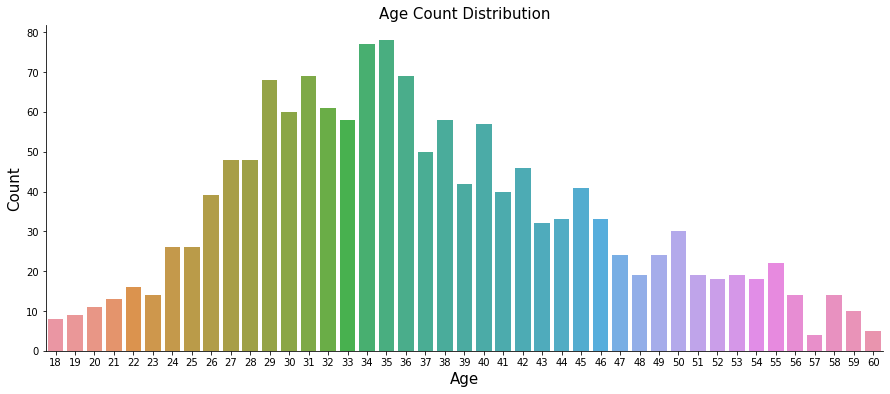

In [58]:
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
sns.countplot(x = 'Age', data = data)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

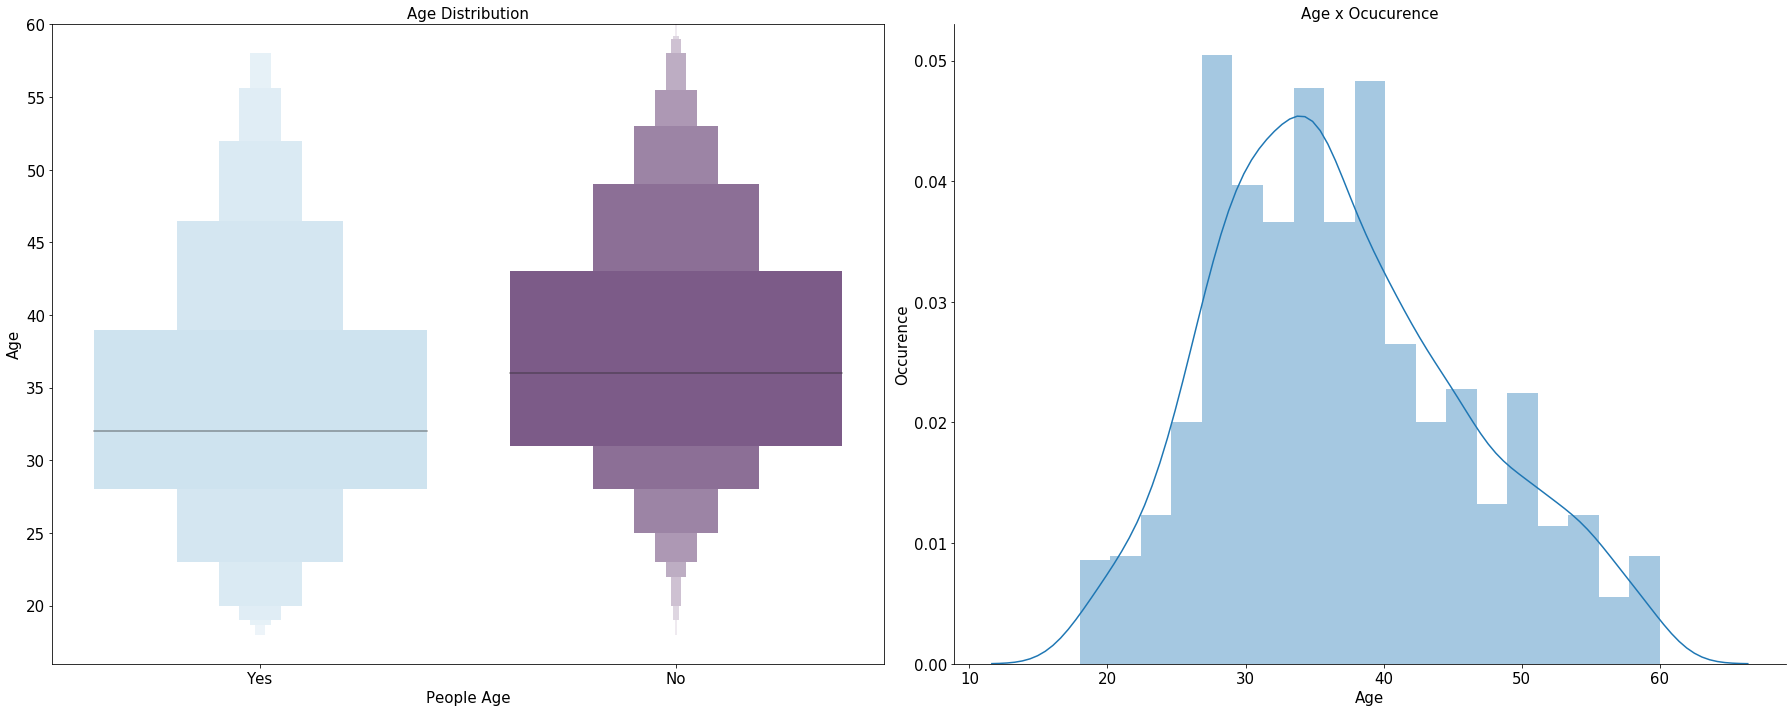

In [59]:
fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (25, 10))
#sns.boxplot(x = 'Age', data = data, orient = 'v', ax = ax1)
sns.boxenplot(x = 'Attrition', y = 'Age', data = data, palette= colors,  ax = ax1)
ax1.set_xlabel('People Age', fontsize=15)
ax1.set_ylabel('Age', fontsize=15)
ax1.set_title('Age Distribution', fontsize=15)
ax1.tick_params(labelsize=15)


sns.distplot(data['Age'], ax = ax2)
sns.despine(ax = ax2)
ax2.set_xlabel('Age', fontsize=15)
ax2.set_ylabel('Occurence', fontsize=15)
ax2.set_title('Age x Ocucurence', fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout() 

выбросов вообще нет

In [60]:
print('1º Quartile: ', data['Age'].quantile(q = 0.25))
print('2º Quartile: ', data['Age'].quantile(q = 0.50))
print('3º Quartile: ', data['Age'].quantile(q = 0.75))

1º Quartile:  30.0
2º Quartile:  36.0
3º Quartile:  43.0


In [61]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['Age'] <= 30, 'Age'] = 1
    dataframe.loc[(dataframe['Age'] > 30) & (dataframe['Age'] <= 45), 'Age'] = 2
    dataframe.loc[dataframe['Age'] > 45, 'Age'] = 3
           
    return dataframe

age(data).head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1,2,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
2,3,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
4,2,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
5,2,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
7,1,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [62]:
data.Attrition = [1 if each == "Yes" else 0 for each in data.Attrition]
data_target = data.Attrition
data.drop(['Attrition'], axis = 1, inplace=True)

In [63]:
data_out.Attrition = [1 if each == "Yes" else 0 for each in data_out.Attrition]

In [64]:
data_out_target = data_out.Attrition
data_out.drop(['Attrition'], axis = 1, inplace=True)

In [65]:
len(data_out_target), len(data_out)

(1271, 1271)

In [66]:
cat_columns = data_out.columns[data_out.dtypes == 'object']
cat_columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

 Закодируем признаки, в которых меньше 2 значений LabelEncoding, а где больше 2 - OneHotEncoding. 

In [67]:
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_columns = 40

labelencoder_X = LabelEncoder()
data_out['Gender'] = labelencoder_X.fit_transform(data_out['Gender'])  
data_out['OverTime'] = labelencoder_X.fit_transform(data_out['OverTime'])
data.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
2,3,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
4,2,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
5,2,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
7,1,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [113]:
cat_columns = cat_columns.drop("Gender")
cat_columns = cat_columns.drop("OverTime")

KeyError: "['Gender'] not found in axis"

In [114]:
dataset_preprocessed = pd.get_dummies(data_out, columns=cat_columns)
dataset_preprocessed

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,...,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,49,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,37,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,...,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
5,33,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,...,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
7,27,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
2062,39,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,...,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2064,27,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,...,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [115]:
# Cross val metric
def cross_val_metrics(model, dataset, target):
    scores = ['accuracy', 'precision', 'recall', 'f1_macro', 'roc_auc']
    for sc in scores:
        scores = cross_val_score(model, dataset, target, cv = k_fold, scoring = sc)
        print('[%s] : %0.5f (+/- %0.5f)'%(sc, scores.mean(), scores.std()))

In [179]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dataset_preprocessed
                                                ,data_out_target, test_size = 0.3, random_state=0, stratify=data_out_target)

In [180]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)



In [181]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

чем больше параметр C, тем более сложные зависимости в данных может восстанавливать модель

In [254]:
from sklearn.linear_model import LogisticRegression

def LogReg(train, target, test):
    model = LogisticRegression(class_weight = 'balanced', random_state=100)
    model.fit(train, target)
    pred = model.predict(test)
    
    return pred

In [215]:
from sklearn import metrics

def visual_matrix(y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    print(classification_report(y_test, y_pred, target_names=['0', '1']))

#### Рассмотрим разные случаи бла бла бла

1. Предскажем результат лог регрессии на тесте  без скалера

              precision    recall  f1-score   support

           0       0.89      0.70      0.78       315
           1       0.29      0.58      0.39        67

    accuracy                           0.68       382
   macro avg       0.59      0.64      0.58       382
weighted avg       0.78      0.68      0.71       382

0.675392670157068
0.3861386138613861


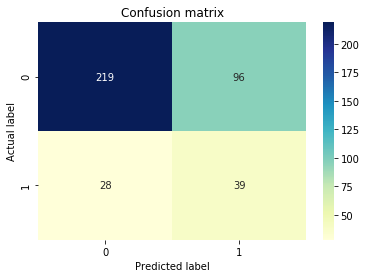

In [255]:
pred = LogReg(X_train, y_train, X_test)
visual_matrix(pred)

print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85       315
           1       0.41      0.73      0.53        67

    accuracy                           0.77       382
   macro avg       0.67      0.75      0.69       382
weighted avg       0.84      0.77      0.79       382

0.7696335078534031
0.5268817204301075


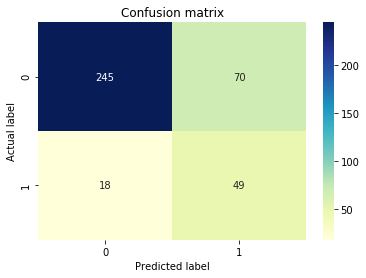

In [256]:
pred = LogReg(X_train_scaled, y_train, X_test_scaled)
visual_matrix(pred)

print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))

Очевидно, что данные нужно стандартизировать.

In [419]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

#oversampler = SMOTE(random_state=100)
oversampler = RandomOverSampler(random_state=100)

smote_train, smote_target = oversampler.fit_sample(X_train_scaled, y_train)

smote_train2, smote_target = oversampler.fit_sample(X_train, y_train)



              precision    recall  f1-score   support

           0       0.93      0.77      0.85       315
           1       0.41      0.73      0.52        67

    accuracy                           0.77       382
   macro avg       0.67      0.75      0.68       382
weighted avg       0.84      0.77      0.79       382

0.7670157068062827
0.7529732290926321
0.5240641711229946


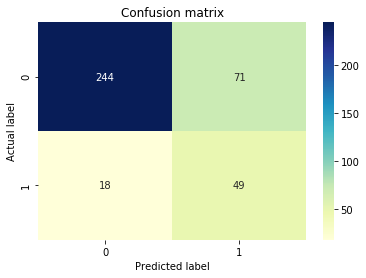

In [379]:
from sklearn.metrics import roc_auc_score
    
pred = LogReg(smote_train, smote_target, X_test_scaled)
visual_matrix(pred)

print(accuracy_score(y_test, pred))
print(roc_auc_score(y_test, pred))
print(f1_score(y_test, pred))

RFE отбор признаков

In [380]:
tests = []

from sklearn.feature_selection import RFE

for index in range(20, 40):
    selector = RFE(LogisticRegression(random_state=100, class_weight = 'balanced'), n_features_to_select = index)
    selector.fit(smote_train, smote_target)
    
    X_train_b = selector.transform(smote_train)
    X_test_b = selector.transform(X_test_scaled)
    
    pred = LogReg(X_train_b, smote_target, X_test_b)
    tests.append(f1_score(y_test, pred))
    #print(accuracy_score(y_test, pred))
    #print(f1_score(y_test, pred))

In [381]:
max_test_score = max(tests)
test_scores_ind = [i for i, v in enumerate(tests) if v == max_test_score]
print('Max test score', max_test_score, test_scores_ind)

Max test score 0.5955056179775281 [2]


In [382]:
fe = RFE(LogisticRegression(random_state=100), n_features_to_select = 22)
fe.fit(smote_train, smote_target)

X_train_b = fe.transform(smote_train)
X_test_b = fe.transform(X_test_scaled)

print(X_train.columns[fe.get_support()])

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'RelationshipSatisfaction', 'WorkLifeBalance', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 'JobRole_Laboratory Technician',
       'JobRole_Research Director', 'JobRole_Sales Executive',
       'JobRole_Sales Representative', 'MaritalStatus_Single'],
      dtype='object')


In [383]:
param_grid = {'C': [0.001,0.01,0.1,1, 1, 5, 10, 100, 1000], 'max_iter': [20, 50, 100, 150, 200, 300], 'penalty': ['l1', 'l2', 'elasticnet', 'None']}

cv = 10

estimator_LR = LogisticRegression(class_weight = 'balanced', random_state=100)

optimazer_LR = GridSearchCV(estimator_LR, param_grid, cv = cv, scoring = 'f1')

optimazer_LR.fit(X_train_b, smote_target)

print(optimazer_LR.best_score_)
print(optimazer_LR.best_params_)

optimazer_LR.score(X_test_b, y_test)

0.790992452451906
{'C': 1, 'max_iter': 20, 'penalty': 'l2'}


0.5955056179775281

In [439]:
features = optimazer_LR.best_estimator_.feature_importances_

In [440]:
columns = X_train.columns
sorted_features = sorted(zip(columns, features), key=lambda x: x[1], reverse=True)

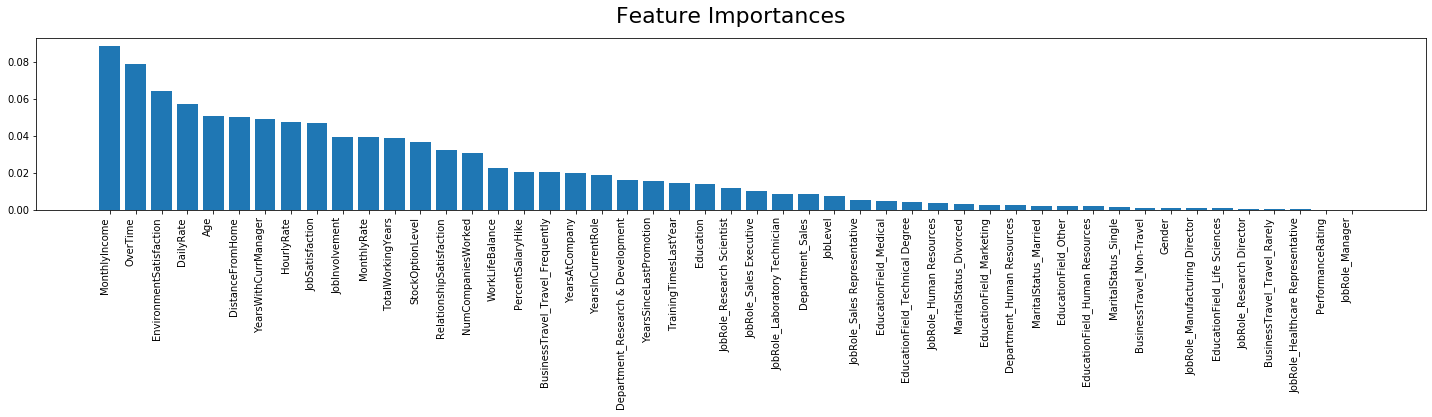

In [446]:
plt.subplots(1, 1, figsize=(20,6), tight_layout=True)

x = [x[0] for x in sorted_features]
height = [x[1] for x in sorted_features]

plt.bar(x=x, height=height)
plt.title('Feature Importances', size=22, y = 1.05)
plt.xticks(rotation = 90, ha = 'right')
plt.show()

In [385]:
model = LogisticRegression(C=1, max_iter=20, penalty = 'l2', class_weight = 'balanced', random_state=100)
model.fit(X_train_b, smote_target)

pred1 = model.predict(X_train_b)
pred = model.predict(X_test_b)

print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))
print(f1_score(smote_target, pred1))
print(roc_auc_score(y_test, pred))


0.8115183246073299
0.5955056179775281
0.7950987066031314
0.8034588959962093


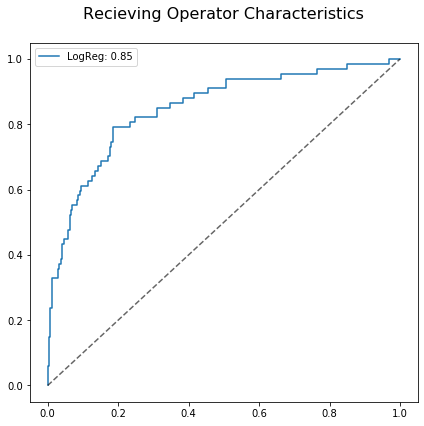

In [423]:
from sklearn.metrics import roc_curve, auc

log_prob = model.predict_proba(X_test_b)[:,1]
fpr, tpr, thresh = roc_curve(y_test, log_prob)
roc_auc = auc(fpr, tpr)

plt.subplots(1, 1, figsize=(6,6), tight_layout=True)

plt.title(f'Recieving Operator Characteristics', size=16, y=1.05)
plt.plot(fpr, tpr, label=f'LogReg: {roc_auc:.2f}')
plt.plot([0,1], [0,1], 'k--', alpha=0.6)

plt.legend(frameon=1, facecolor='w')

plt.show()

In [386]:
cross_val_metrics(model, X_train_b, smote_target)

[accuracy] : 0.78692 (+/- 0.03709)
[precision] : 0.78334 (+/- 0.04302)
[recall] : 0.79582 (+/- 0.03916)
[f1_macro] : 0.78667 (+/- 0.03726)
[roc_auc] : 0.86895 (+/- 0.03271)


              precision    recall  f1-score   support

           0       0.95      0.82      0.88       315
           1       0.48      0.79      0.60        67

    accuracy                           0.81       382
   macro avg       0.71      0.80      0.74       382
weighted avg       0.87      0.81      0.83       382



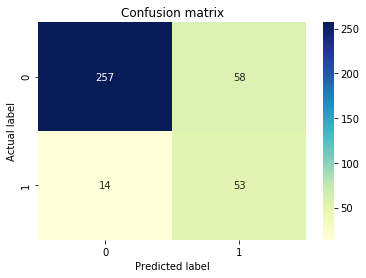

In [387]:
visual_matrix(pred)

In [392]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1, 20):
    
    knn = KNeighborsClassifier(i)
    knn.fit(smote_train, smote_target)
    
    test_scores.append(knn.score(X_test_scaled, y_test))

In [393]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.31937172774869 % and k = [1]


In [395]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(1)
classifier_knn.fit(smote_train, smote_target)

knn = classifier_knn.predict(X_test_scaled)

print(accuracy_score(y_test, knn))
print(f1_score(y_test, knn))

0.7931937172774869
0.3008849557522124


In [396]:
from sklearn.metrics import f1_score
print(f1_score(y_test, knn))
print(roc_auc_score(y_test, knn))

0.3008849557522124
0.580833925610045


              precision    recall  f1-score   support

           0       0.85      0.91      0.88       315
           1       0.37      0.25      0.30        67

    accuracy                           0.79       382
   macro avg       0.61      0.58      0.59       382
weighted avg       0.77      0.79      0.78       382



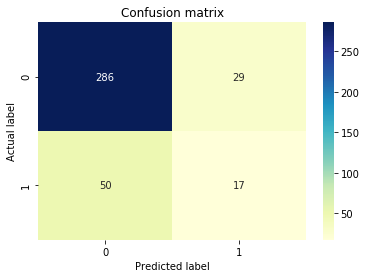

In [407]:
visual_matrix(knn)

In [398]:
cross_val_metrics(classifier_knn, smote_train, smote_target)

[accuracy] : 0.94059 (+/- 0.01776)
[precision] : 0.89803 (+/- 0.02650)
[recall] : 0.99453 (+/- 0.00913)
[f1_macro] : 0.94031 (+/- 0.01784)
[roc_auc] : 0.94061 (+/- 0.01756)


              precision    recall  f1-score   support

           0       0.90      0.90      0.90       315
           1       0.54      0.54      0.54        67

    accuracy                           0.84       382
   macro avg       0.72      0.72      0.72       382
weighted avg       0.84      0.84      0.84       382



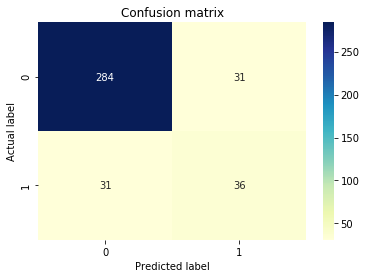

In [416]:
from sklearn.svm import SVC

svc = SVC(random_state = 100, class_weight = 'balanced')
svc.fit(smote_train, smote_target)
pred = svc.predict(X_test_scaled)

visual_matrix(pred)        

In [413]:
param_grid = {'C': [0.1, 0.2, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'kernel': ['linear', 'rbf','poly', 'sigmoid']}

cv = 10

estimator_LR = SVC(random_state = 100, class_weight = 'balanced')

optimazer_LR = GridSearchCV(estimator_LR, param_grid, cv = cv, scoring = 'f1')

optimazer_LR.fit(smote_train, smote_target)

print(optimazer_LR.best_score_)
print(optimazer_LR.best_params_)

optimazer_LR.score(X_test_scaled, y_test)

0.9766659637314079
{'C': 10, 'kernel': 'poly'}


0.3469387755102041

In [412]:
optimazer_LR.best_estimator_

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=100, shrinking=True, tol=0.001,
    verbose=False)

              precision    recall  f1-score   support

           0       0.86      0.96      0.90       315
           1       0.55      0.25      0.35        67

    accuracy                           0.83       382
   macro avg       0.70      0.60      0.63       382
weighted avg       0.80      0.83      0.81       382



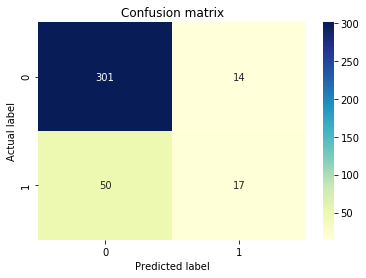

In [415]:
svc = SVC(random_state = 100, class_weight = 'balanced', C=10, kernel = 'poly')
svc.fit(smote_train, smote_target)
pred = svc.predict(X_test_scaled)

visual_matrix(pred)   

Text(0.5, 15.0, 'Predicted label')

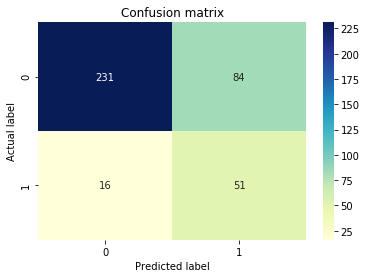

In [495]:
from sklearn import metrics

y_pred = svc.predict(X_test_scaled)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [496]:
cross_val_metrics(svc, dataset_preprocessed_scl)

[accuracy] : 0.86311 (+/- 0.01688)
[precision] : 0.74424 (+/- 0.16860)
[recall] : 0.35111 (+/- 0.08496)
[f1] : 0.46844 (+/- 0.09707)


In [424]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier(max_features=20, max_leaf_nodes=200, random_state = 100, class_weight = "balanced")
classifier_dt.fit(smote_train2, smote_target)

tree = classifier_dt.predict(X_test)
print(accuracy_score(y_test, tree))

0.7801047120418848


In [425]:
from sklearn.metrics import f1_score
f1_score(y_test, tree)

0.38235294117647056

Text(0.5, 15.0, 'Predicted label')

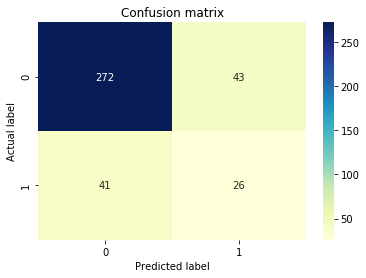

In [426]:
from sklearn import metrics

y_pred = classifier_dt.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [427]:
cross_val_metrics(classifier_dt, dataset_preprocessed)

TypeError: cross_val_metrics() missing 1 required positional argument: 'target'

In [431]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 800, random_state=100)
classifier_rf.fit(smote_train, smote_target)
class_ = classifier_rf.predict(X_test_scaled)

print(accuracy_score(y_test, class_))
print(f1_score(y_test, class_))
print(roc_auc_score(y_test, class_))

0.856020942408377
0.3373493975903615
0.6013030087656953


              precision    recall  f1-score   support

           0       0.86      0.99      0.92       315
           1       0.88      0.21      0.34        67

    accuracy                           0.86       382
   macro avg       0.87      0.60      0.63       382
weighted avg       0.86      0.86      0.82       382



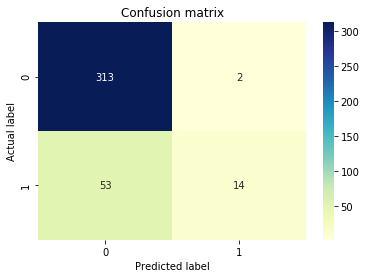

In [432]:
visual_matrix(class_)

In [506]:
cross_val_metrics(classifier_rf, dataset_preprocessed)

[accuracy] : 0.84420 (+/- 0.01542)
[precision] : 0.83333 (+/- 0.23570)
[recall] : 0.13628 (+/- 0.06800)
[f1] : 0.22920 (+/- 0.10505)


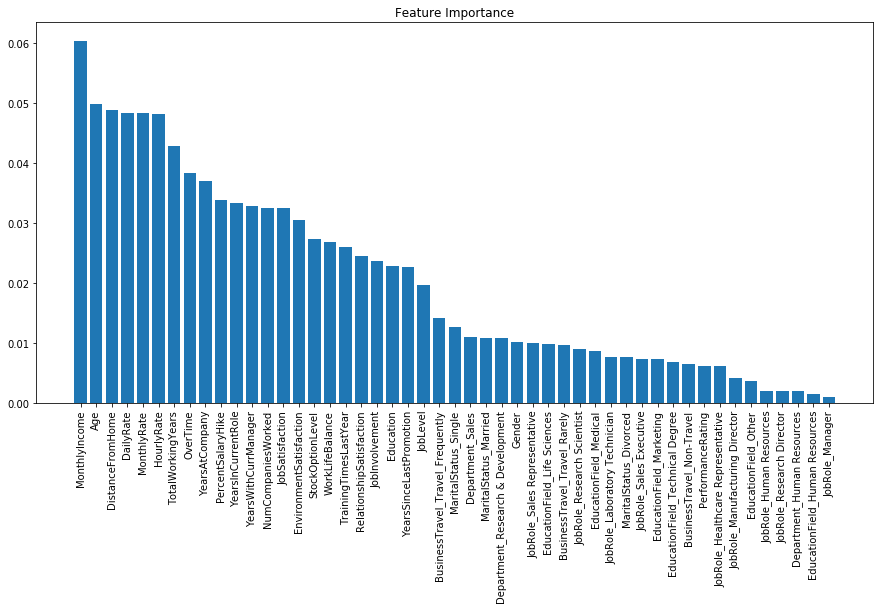

In [433]:
importances = classifier_rf.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(X_train.shape[1]), importances[indices]) 
plt.xticks(range(X_train.shape[1]), names, rotation=90) 
plt.show() 

In [348]:
gb_params ={
    'n_estimators': 1500,
    'max_features': 0.9,
    'learning_rate' : 0.25,
    'max_depth': 4,
    'min_samples_leaf': 2,
    'subsample': 1,
    'max_features' : 'sqrt',
    'random_state' : 30,
    'verbose': 0
}

In [434]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(**gb_params)
gb.fit(smote_train2, smote_target)

pred = gb.predict(X_test)

print(accuracy_score(y_test, pred))

0.8612565445026178


In [435]:
from sklearn.metrics import f1_score
f1_score(y_test, pred)

0.4752475247524752

In [436]:
param_grid = {'n_estimators': [1500, 1000, 200, 400, 600], 'max_depth': [3, 4, 5, 6]}

cv = 10

estimator_LR = GradientBoostingClassifier(random_state=100)

optimazer_LR = GridSearchCV(estimator_LR, param_grid, cv = cv, scoring = 'f1')

optimazer_LR.fit(smote_train2, smote_target)

print(optimazer_LR.best_score_)
print(optimazer_LR.best_params_)

optimazer_LR.score(X_test, y_test)

0.980542491496613
{'max_depth': 6, 'n_estimators': 200}


0.3870967741935484

Text(0.5, 15.0, 'Predicted label')

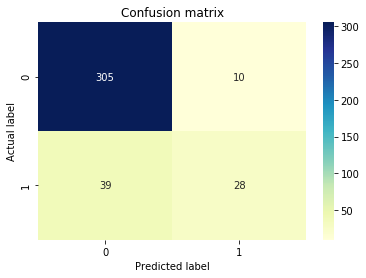

In [511]:
from sklearn import metrics

y_pred = gb.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [512]:
cross_val_metrics(gb, dataset_preprocessed)

[accuracy] : 0.86153 (+/- 0.01725)
[precision] : 0.72379 (+/- 0.14791)
[recall] : 0.37545 (+/- 0.03609)
[f1] : 0.48743 (+/- 0.04480)


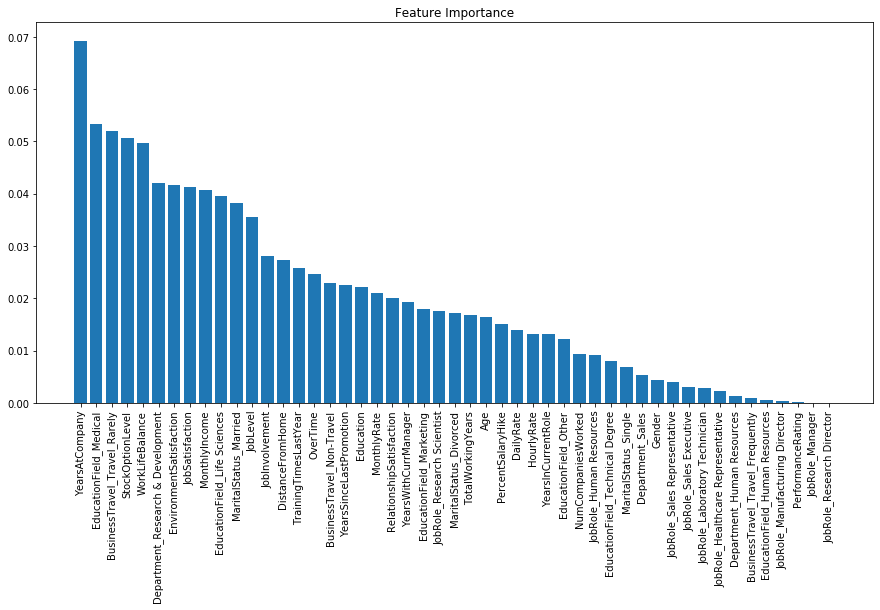

In [476]:
importances = gb.feature_importances_
indices = np.argsort(importances)[::-1]
names = [X_train.columns[i] for i in indices] 
plt.figure(figsize=(15, 7)) 
plt.title("Feature Importance") 
plt.bar(range(X_train.shape[1]), importances[indices]) 
plt.xticks(range(X_train.shape[1]), names, rotation=90) 
plt.show() 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_new = GradientBoostingClassifier(**gb_params)
gb_new.fit(smote_train, smote_target)

pred = gb.predict(X_test)

print(accuracy_score(y_test, pred))